# Database Integration: Mobile Money


1. Create tables to store data
2. Insert data into tables
3. Query (retrieve) data from tables
4. Update and delete data
5. Join tables together to get more information
6. Load database data into Pandas

In [12]:
# Import the libraries we need
import sqlite3  # This helps us work with SQLite databases
import pandas as pd  # This helps us work with data in tables
import numpy as np  # This helps us with numerical calculations


In [13]:
# Create sample data about mobile money in different countries
countries = [
    {'country_code': 'KEN', 'country_name': 'Kenya'},
    {'country_code': 'NGA', 'country_name': 'Nigeria'},
    {'country_code': 'UGA', 'country_name': 'Uganda'},
    {'country_code': 'TZA', 'country_name': 'Tanzania'},
    {'country_code': 'GHA', 'country_name': 'Ghana'},
    {'country_code': 'ZAF', 'country_name': 'South Africa'},
    {'country_code': 'ETH', 'country_name': 'Ethiopia'},
    {'country_code': 'EGY', 'country_name': 'Egypt'},
    {'country_code': 'CMR', 'country_name': 'Cameroon'},
    {'country_code': 'SDN', 'country_name': 'Sudan'}
]

# Show countries data
print("\nCountries data:")
countries_df = pd.DataFrame(countries)
display(countries_df)

# Mobile money transactions
transactions = [
    ('KEN', 2021, 45.2, 40.1),  # Kenya
    ('NGA', 2021, 30.1, 25.5),  # Nigeria
    ('UGA', 2021, 28.7, 22.3),  # Uganda
    ('TZA', 2021, 27.5, 20.0),  # Tanzania
    ('GHA', 2021, 26.8, 19.9),  # Ghana
    ('ZAF', 2021, 25.0, 18.7),  # South Africa
    ('ETH', 2021, 24.2, 17.5),  # Ethiopia
    ('EGY', 2021, 23.5, 16.8),  # Egypt
    ('CMR', 2021, 22.9, 15.2),  # Cameroon
    ('SDN', 2021, 21.7, 14.0)   # Sudan
]

# Show  transaction data 
print("\nTransactions data:")
transactions_df = pd.DataFrame(transactions, 
                              columns=['country_code', 'year', 'send_rate', 'withdraw_rate'])
display(transactions_df)


# Create arrays for the rates 
send_rates = np.array([t[2] for t in transactions])
withdraw_rates = np.array([t[3] for t in transactions])

# Calculate averages and standard deviations
send_mean = send_rates.mean()
send_std = send_rates.std()
withdraw_mean = withdraw_rates.mean()
withdraw_std = withdraw_rates.std()

print(f"\nAverage send rate: {send_mean:.2f}")
print(f"Average withdraw rate: {withdraw_mean:.2f}")

# Create full transactions data with calculated fields
transactions_full = []
for t in transactions:
    country_code, year, send_rate, withdraw_rate = t
    
    # Calculate the difference between send and withdraw rates
    send_minus_withdraw = send_rate - withdraw_rate
    send_zscore = (send_rate - send_mean) / send_std
    withdraw_zscore = (withdraw_rate - withdraw_mean) / withdraw_std
    
    transactions_full.append((country_code, year, send_rate, withdraw_rate, 
                             send_minus_withdraw, send_zscore, withdraw_zscore))

# Show transaction data
print("\nFull transactions data with calculated fields:")
full_df = pd.DataFrame(transactions_full, 
                      columns=['country_code', 'year', 'send_rate', 'withdraw_rate', 
                               'send_minus_withdraw', 'send_zscore', 'withdraw_zscore'])
display(full_df)


Countries data:


,country_code,country_name
0,KEN,Kenya
1,NGA,Nigeria
2,UGA,Uganda
3,TZA,Tanzania
4,GHA,Ghana
5,ZAF,South Africa
6,ETH,Ethiopia
7,EGY,Egypt
8,CMR,Cameroon
9,SDN,Sudan



Transactions data:


,country_code,year,send_rate,withdraw_rate
0,KEN,2021,45.2,40.1
1,NGA,2021,30.1,25.5
2,UGA,2021,28.7,22.3
3,TZA,2021,27.5,20.0
4,GHA,2021,26.8,19.9
5,ZAF,2021,25.0,18.7
6,ETH,2021,24.2,17.5
7,EGY,2021,23.5,16.8
8,CMR,2021,22.9,15.2
9,SDN,2021,21.7,14.0



Average send rate: 27.56
Average withdraw rate: 21.00

Full transactions data with calculated fields:


,country_code,year,send_rate,withdraw_rate,send_minus_withdraw,send_zscore,withdraw_zscore
0,KEN,2021,45.2,40.1,5.1,2.755295,2.683018
1,NGA,2021,30.1,25.5,4.6,0.396737,0.632125
2,UGA,2021,28.7,22.3,6.4,0.178063,0.182614
3,TZA,2021,27.5,20.0,7.5,-0.009372,-0.140472
4,GHA,2021,26.8,19.9,6.9,-0.118709,-0.154519
5,ZAF,2021,25.0,18.7,6.3,-0.399861,-0.323086
6,ETH,2021,24.2,17.5,6.7,-0.524818,-0.491653
7,EGY,2021,23.5,16.8,6.7,-0.634155,-0.589983
8,CMR,2021,22.9,15.2,7.7,-0.727873,-0.814739
9,SDN,2021,21.7,14.0,7.7,-0.915308,-0.983305


In [14]:
# Create a database to store data

# Connect to a SQLite database
conn = sqlite3.connect('mobile_money.db')
cursor = conn.cursor()

print("Creating database tables...")

# Create a table to store countries
cursor.execute('''
CREATE TABLE IF NOT EXISTS countries (
    country_code TEXT PRIMARY KEY,
    country_name TEXT NOT NULL UNIQUE
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS transactions (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    country_code TEXT NOT NULL,
    year INTEGER NOT NULL,
    send_rate REAL NOT NULL,
    withdraw_rate REAL NOT NULL,
    send_minus_withdraw REAL,
    send_zscore REAL,
    withdraw_zscore REAL,
    FOREIGN KEY (country_code) REFERENCES countries(country_code)
)
''')

cursor.execute('CREATE INDEX IF NOT EXISTS idx_country_year ON transactions(country_code, year)')

# Save changes
conn.commit()

print("Database tables created successfully.")


Creating database tables...
Database tables created successfully.


In [15]:
# Insert our data into the database tables
for country in countries:
    cursor.execute(
        'INSERT OR IGNORE INTO countries (country_code, country_name) VALUES (?, ?)',
        (country['country_code'], country['country_name'])
    )
print(f"Added {len(countries)} countries to the database")

cursor.executemany('''
    INSERT INTO transactions 
    (country_code, year, send_rate, withdraw_rate, send_minus_withdraw, send_zscore, withdraw_zscore)
    VALUES (?, ?, ?, ?, ?, ?, ?)
''', transactions_full)
print(f"Added {len(transactions_full)} transactions to the database")

# Save changes 
conn.commit()

Added 10 countries to the database
Added 10 transactions to the database


In [16]:
# Query data from the database

# Find the top 5 countries with highest sending rates
query1 = '''
SELECT 
    c.country_name,                  
    AVG(t.send_rate) as avg_send     
FROM 
    transactions t                   
JOIN 
    countries c                     
ON 
    t.country_code = c.country_code  
GROUP BY 
    c.country_name                   
ORDER BY 
    avg_send DESC                   
LIMIT 5                           
'''

top_send = pd.read_sql(query1, conn)

# Display the results
print('\nTop 5 countries by average sending rate:')
display(top_send)

# Find the average withdrawal rate for all countries
query2 = '''
SELECT 
    c.country_name,                      
    AVG(t.withdraw_rate) as avg_withdraw 
FROM 
    transactions t                       
JOIN 
    countries c                         
ON 
    t.country_code = c.country_code      
GROUP BY 
    c.country_name                      
ORDER BY 
    avg_withdraw DESC                  
'''

# Run the query and get results
avg_withdraw = pd.read_sql(query2, conn)
print('\nAverage withdrawal rate by country:')
display(avg_withdraw)


Top 5 countries by average sending rate:


,country_name,avg_send
0,Kenya,49.200294
1,Nigeria,30.100000
2,Uganda,28.700000
3,Tanzania,27.500000
4,Ghana,26.800000



Average withdrawal rate by country:


,country_name,avg_withdraw
0,Kenya,40.1
1,Nigeria,25.5
2,Uganda,22.3
3,Tanzania,20.0
4,Ghana,19.9
5,South Africa,18.7
6,Ethiopia,17.5
7,Egypt,16.8
8,Cameroon,15.2
9,Sudan,14.0


In [17]:
# Update and delete data in our database

# Let's first look at the current data for Kenya
query_kenya_before = '''
SELECT c.country_name, t.send_rate, t.withdraw_rate 
FROM transactions t 
JOIN countries c ON t.country_code = c.country_code 
WHERE c.country_name = 'Kenya'
'''

print("\nKenya's data BEFORE update:")
kenya_before = pd.read_sql(query_kenya_before, conn)
display(kenya_before)

# Update data - Increase the send_rate for Kenya by 5%
cursor.execute('''
UPDATE transactions 
SET send_rate = send_rate * 1.05
WHERE country_code = ?
''', ('KEN',))

# Save changes
conn.commit()


query_kenya_after = '''
SELECT c.country_name, t.send_rate, t.withdraw_rate 
FROM transactions t 
JOIN countries c ON t.country_code = c.country_code 
WHERE c.country_name = 'Kenya'
'''
kenya_after = pd.read_sql(query_kenya_after, conn)
print("\nKenya's data AFTER update:")
display(kenya_after)

# Sudan before deleting
query_sudan_before = '''
SELECT c.country_name, t.year, t.send_rate, t.withdraw_rate 
FROM transactions t 
JOIN countries c ON t.country_code = c.country_code 
WHERE c.country_name = 'Sudan'
'''
sudan_before = pd.read_sql(query_sudan_before, conn)
print("\nSudan's data BEFORE deletion:")
display(sudan_before)

# Remove transactions for Sudan in 2021
cursor.execute('''
DELETE FROM transactions 
WHERE country_code = ? 
AND year = ?            
''', ('SDN', 2021))  

conn.commit()
print("Deleted transactions for Sudan in 2021")

# Check if Sudan's data was deleted
query_sudan_after = '''
SELECT c.country_name, t.year, t.send_rate, t.withdraw_rate 
FROM transactions t 
JOIN countries c ON t.country_code = c.country_code 
WHERE c.country_name = 'Sudan'
'''
sudan_after = pd.read_sql(query_sudan_after, conn)
print("\nSudan's data AFTER deletion:")
if len(sudan_after) == 0:
    print("No data found for Sudan in 2021.")
else:
    display(sudan_after)


Kenya's data BEFORE update:


,country_name,send_rate,withdraw_rate
0,Kenya,54.940883,40.1
1,Kenya,47.460000,40.1
2,Kenya,45.200000,40.1



Kenya's data AFTER update:


,country_name,send_rate,withdraw_rate
0,Kenya,57.687927,40.1
1,Kenya,49.833000,40.1
2,Kenya,47.460000,40.1



Sudan's data BEFORE deletion:


,country_name,year,send_rate,withdraw_rate
0,Sudan,2021,21.7,14.0


Deleted transactions for Sudan in 2021

Sudan's data AFTER deletion:
No data found for Sudan in 2021.


In [18]:
# Join tables to get more complete information
query_join = '''
SELECT 
    c.country_name,
    t.year,
    t.send_rate,
    t.withdraw_rate,
    t.send_minus_withdraw
FROM 
    transactions t
JOIN 
    countries c
ON 
    t.country_code = c.country_code
ORDER BY 
    t.send_rate DESC
'''

# Run the query and get results
joined_df = pd.read_sql(query_join, conn)

# Display the results
print('\nJoined country and transaction data:')
display(joined_df)

# Let's also calculate some statistics about the data
print(f"Average send rate across all countries: {joined_df['send_rate'].mean():.2f}")
print(f"Highest send rate: {joined_df['send_rate'].max():.2f} (in {joined_df.loc[joined_df['send_rate'].idxmax()]['country_name']})")
print(f"Lowest send rate: {joined_df['send_rate'].min():.2f} (in {joined_df.loc[joined_df['send_rate'].idxmin()]['country_name']})")
print(f"Average difference between send and withdraw rates: {joined_df['send_minus_withdraw'].mean():.2f}")


Joined country and transaction data:


,country_name,year,send_rate,withdraw_rate,send_minus_withdraw
0,Kenya,2021,57.687927,40.1,5.1
1,Kenya,2021,49.833000,40.1,5.1
2,Kenya,2021,47.460000,40.1,5.1
3,Nigeria,2021,30.100000,25.5,4.6
4,Nigeria,2021,30.100000,25.5,4.6
5,Nigeria,2021,30.100000,25.5,4.6
6,Uganda,2021,28.700000,22.3,6.4
7,Uganda,2021,28.700000,22.3,6.4
8,Uganda,2021,28.700000,22.3,6.4
9,Tanzania,2021,27.500000,20.0,7.5


Average send rate across all countries: 28.93
Highest send rate: 57.69 (in Kenya)
Lowest send rate: 22.90 (in Cameroon)
Average difference between send and withdraw rates: 6.43


In [19]:
# Load all database data into pandas DataFrames for analysis
conn = sqlite3.connect('mobile_money.db')

query_transactions = 'SELECT * FROM transactions'
all_transactions = pd.read_sql(query_transactions, conn)

print('\nAll transactions from database:')
display(all_transactions)

# Load all countries into a DataFrame
query_countries = 'SELECT * FROM countries'
all_countries = pd.read_sql(query_countries, conn)

print('\nAll countries from database:')
display(all_countries)

# Create combined DataFrame with country names instead of codes
print("\nCreating a combined DataFrame...")
combined_df = pd.merge(
    all_transactions,
    all_countries,
    on='country_code',
    how='left'
)

print('\nCombined data with country names:')
display(combined_df)

# Use pandas to analyze data
print(f"Number of countries: {combined_df['country_name'].nunique()}")
print(f"Average send rate: {combined_df['send_rate'].mean():.2f}")
print(f"Average withdraw rate: {combined_df['withdraw_rate'].mean():.2f}")
print(f"Correlation between send and withdraw rates: {combined_df['send_rate'].corr(combined_df['withdraw_rate']):.2f}")

conn.close()


All transactions from database:


,id,country_code,year,send_rate,withdraw_rate,send_minus_withdraw,send_zscore,withdraw_zscore
0,1,KEN,2021,57.687927,40.1,5.1,2.755295,2.683018
1,2,NGA,2021,30.100000,25.5,4.6,0.396737,0.632125
2,3,UGA,2021,28.700000,22.3,6.4,0.178063,0.182614
3,4,TZA,2021,27.500000,20.0,7.5,-0.009372,-0.140472
4,5,GHA,2021,26.800000,19.9,6.9,-0.118709,-0.154519
5,6,ZAF,2021,25.000000,18.7,6.3,-0.399861,-0.323086
6,7,ETH,2021,24.200000,17.5,6.7,-0.524818,-0.491653
7,8,EGY,2021,23.500000,16.8,6.7,-0.634155,-0.589983
8,9,CMR,2021,22.900000,15.2,7.7,-0.727873,-0.814739
9,11,KEN,2021,49.833000,40.1,5.1,2.755295,2.683018



All countries from database:


,country_code,country_name
0,KEN,Kenya
1,NGA,Nigeria
2,UGA,Uganda
3,TZA,Tanzania
4,GHA,Ghana
5,ZAF,South Africa
6,ETH,Ethiopia
7,EGY,Egypt
8,CMR,Cameroon
9,SDN,Sudan



Creating a combined DataFrame...

Combined data with country names:


,id,country_code,year,send_rate,withdraw_rate,send_minus_withdraw,send_zscore,withdraw_zscore,country_name
0,1,KEN,2021,57.687927,40.1,5.1,2.755295,2.683018,Kenya
1,2,NGA,2021,30.100000,25.5,4.6,0.396737,0.632125,Nigeria
2,3,UGA,2021,28.700000,22.3,6.4,0.178063,0.182614,Uganda
3,4,TZA,2021,27.500000,20.0,7.5,-0.009372,-0.140472,Tanzania
4,5,GHA,2021,26.800000,19.9,6.9,-0.118709,-0.154519,Ghana
5,6,ZAF,2021,25.000000,18.7,6.3,-0.399861,-0.323086,South Africa
6,7,ETH,2021,24.200000,17.5,6.7,-0.524818,-0.491653,Ethiopia
7,8,EGY,2021,23.500000,16.8,6.7,-0.634155,-0.589983,Egypt
8,9,CMR,2021,22.900000,15.2,7.7,-0.727873,-0.814739,Cameroon
9,11,KEN,2021,49.833000,40.1,5.1,2.755295,2.683018,Kenya


Number of countries: 9
Average send rate: 28.93
Average withdraw rate: 21.78
Correlation between send and withdraw rates: 0.97


Mobile Money Send Rates by Country


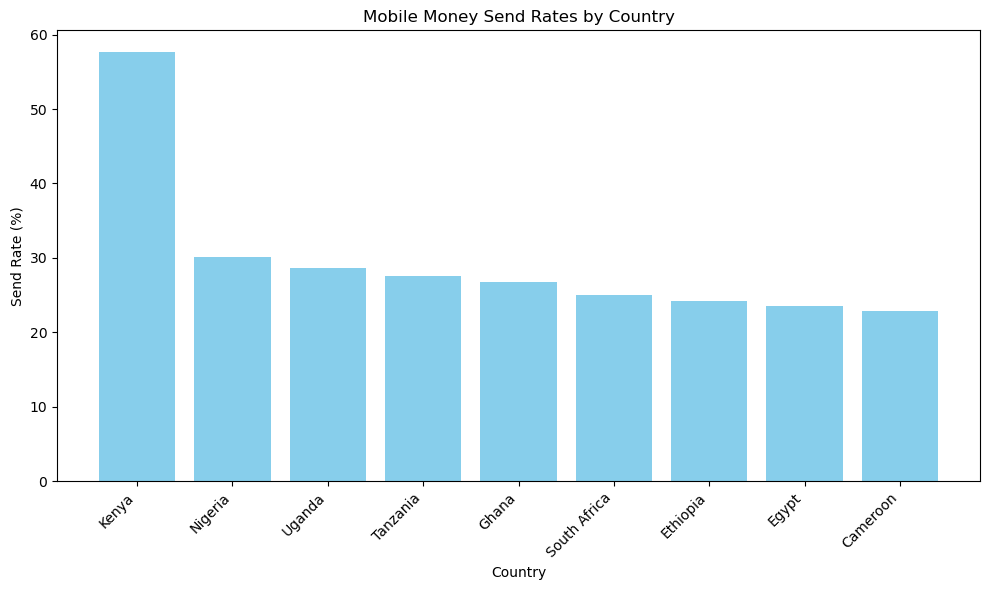

In [20]:
# Create some visualizations of our data
conn = sqlite3.connect('mobile_money.db')

# Get the data for our charts
query = '''
SELECT 
    c.country_name,
    t.send_rate,
    t.withdraw_rate,
    t.send_minus_withdraw
FROM 
    transactions t
JOIN 
    countries c ON t.country_code = c.country_code
ORDER BY
    t.send_rate DESC
'''
chart_data = pd.read_sql(query, conn)

# Create a simple bar chart of send rates by country
print("Mobile Money Send Rates by Country")
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(chart_data['country_name'], chart_data['send_rate'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Send Rate (%)')
plt.title('Mobile Money Send Rates by Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Close connection
conn.close()